# Visualizing Global Economic Growth and Stability (2010-2025): Insights Toward Achieving SDG 8

This README file contains the code and documentation for a data visualization project analyzing global economic trends and macroeconomic stability from 2010 to 2025.

The project is aligned with the **United Nations Sustainable Development Goal 8 (SDG 8): Promote sustained, inclusive, and sustainable economic growth, full and productive employment and decent work for all**.

---

## Project Overview and Objectives

This study examines the evolution of macroeconomic stability and global economic growth in 217 countries between 2010 and 2025.

The project aims to answer three core questions:

1.  **Fiscal Correlation:** How do fiscal indicators (government expenditure and tax revenue) correlate with GDP growth across countries?
2.  **Differential Influence:** Which macroeconomic indicators contribute most to the growth and stability of low-income compared to high-income countries?
3.  **Regional Patterns:** What sub-regional patterns can be observed in economic growth, and how do these regions converge or diverge from 2010-2025?

---

## Key Findings

The primary visualizations revealed several structural challenges and trends:

* **Weak Fiscal Correlation:** The correlation between government expenditure and GDP growth is non-linear and conditional. Simply increasing the volume of spending does not guarantee success; the **quality and efficiency of fiscal policy** are far more critical.
* **Fiscal Inequality:** High-income countries have significantly greater fiscal capacity (larger revenue and expenditure as a % of GDP) than low-income countries, allowing them to better support public services and buffer shocks.
* **Economic Divergence:** The evidence decisively points to **divergence**. The poorest nations are consistently marked with lighter colors on the choropleth map, indicating they are not growing fast enough to meet the **7% growth target for Least Developed Countries (LDCs)**, ensuring the wealth gap continues to expand.

---

## Repository Structure and Methodology

### Data Sources

* **Primary Dataset:** World Bank Data 2025 (Global Economic Indicators (2010-2025)).
* **Secondary Source:** World Bank Income Classification Data.

### Files

| File Name | Description |
| :--- | :--- |
| **`cleaned_world_bank_data_2025.csv`** | **The final, cleaned dataset** (3,472 rows, 15 columns) used for all analyses. This file has had missing values imputed and outliers handled. |
| `G10_4CSD_CODE.ipynb` | The Jupyter Notebook containing all steps for data loading, EDA, and visualization generation. |
| `COURSE PROJECT_G10_4CSD.pdf` | The complete final report. |

***Note on Data Structure:*** The original dataset included "Public Debt (% of GDP)," but this column was dropped during the data preparation phase because it contained over 75% missing values, making it unsuitable for reliable imputation and analysis.

### Indicators Used

The analysis primarily focused on:

* GDP Growth (% Annual)
* Unemployment Rate (%)
* Inflation (CPI %)
* Government Expense (% of GDP)
* Government Revenue (% of GDP)
* Tax Revenue (% of GDP)

### Methodology

The visualization process involved several steps:

1.  **Data Preparation (Tableau Prep):** Steps included fixing data types, removing duplicates, **imputing missing values** (using country-level medians and global medians as fallback), filtering invalid entries, and **handling outliers** via Winsorization.
2.  **Exploratory Data Analysis (EDA):** Included checks on duplicates, data types, summary statistics, distributions (histograms), and outlier detection (boxplots).
3.  **Visualization:** Employed a range of techniques to illustrate findings:
    * **Line Charts:** For time-series analysis (e.g., Global Average GDP Growth vs. Unemployment Rate).
    * **Stacked Bar Charts:** To compare fiscal indicators across Low, Middle, and High-Income groups.
    * **Scatterplots:** To assess the correlation between fiscal indicators and GDP Growth.
    * **Choropleth Map:** To visualize GDP per Capita Growth Rate by country and identify regional divergence.
    * **Small Multiples:** To analyze sub-regional convergence/divergence patterns.

---

## Getting Started

To run the code and reproduce the analysis:

1.  **Dependencies:** Ensure you have Python and necessary libraries (e.g., `pandas`, `matplotlib`, `seaborn`, `Jupyter`) installed.
2.  **Execution:** Open the `G10_4CSD_CODE.ipynb` file in a Jupyter environment and run the cells sequentially.

---

## Policy Recommendations

Based on the findings, policymakers should prioritize:

* **Strengthening Fiscal Capacity in Low-Income Countries:** Improve tax systems and broaden the revenue base.
* **Promoting Productivity-Led Growth:** Shift growth models toward sustained long-term expansion through investments in human capital and innovation.
* **Supporting Labor Market Formalization:** Reduce barriers to formal employment to translate economic growth into **decent work**.
* **Targeting Inequality and Vulnerability:** Implement tailored policies to counteract the differential influence of economic shocks, particularly in regions like Sub-Saharan Africa.

## Future Explorations

Future research could expand on this study by:

* Incorporating additional economic and social indicators (e.g., poverty rates, human capital indices).
* Utilizing machine learning models (e.g., clustering or causal inference).
* Expanding the dataset beyond 2025 to study longer-term structural cycles.
* Integrating qualitative datasets, such as governance or institutional quality.

# **Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("world_bank_data_2025.csv", na_values=["", " "], keep_default_na=False)
df.head()

country_name country_id  year  Inflation (CPI %)  GDP (Current USD)  \
0        Aruba         aw  2010           2.078141       2.453597e+09   
1        Aruba         aw  2011           4.316297       2.637859e+09   
2        Aruba         aw  2012           0.627472       2.615208e+09   
3        Aruba         aw  2013          -2.372065       2.727850e+09   
4        Aruba         aw  2014           0.421441       2.790850e+09   

   GDP per Capita (Current USD)  Unemployment Rate (%)  \
0                  24093.140151                    NaN   
1                  25712.384302                    NaN   
2                  25119.665545                    NaN   
3                  25813.576727                    NaN   
4                  26129.839062                    NaN   

   Interest Rate (Real, %)  Inflation (GDP Deflator, %)  \
0                11.666131                    -1.223407   
1                 4.801974                     4.005674   
2                 8.200875                     0.184033   
3                10.709709                    -1.995948   
4                 3.213869                     3.958897   

   GDP Growth (% Annual)  Current Account Balance (% GDP)  \
0              -2.733457                       -18.752537   
1               3.369237                        -9.877656   
2              -1.040800                         3.473451   
3               6.431483                       -11.813206   
4              -1.586575                        -4.658577   

   Government Expense (% of GDP)  Government Revenue (% of GDP)  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   Tax Revenue (% of GDP)  Gross National Income (USD)  Public Debt (% of GDP)  
0                     NaN                 2.313385e+09                     NaN  
1                     NaN                 2.391841e+09                     NaN  
2                     NaN                 2.499118e+09                     NaN  
3                     NaN                 2.563517e+09                     NaN  
4                     NaN                 2.688102e+09                     NaN

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Summary statistics for key numerical variables (mean, std)
summary_stats = df[numerical_columns].describe().T

# Add median and standard deviation
summary_stats['median'] = df[numerical_columns].median()
summary_stats['std'] = df[numerical_columns].std()

print(summary_stats)

                                  count          mean           std  \
year                             3472.0  2.017500e+03  4.610436e+00   
Inflation (CPI %)                2694.0  6.233154e+00  1.972690e+01   
GDP (Current USD)                2933.0  3.964323e+11  1.749315e+12   
GDP per Capita (Current USD)     2938.0  1.848350e+04  2.730181e+04   
Unemployment Rate (%)            2795.0  7.841141e+00  5.964358e+00   
Interest Rate (Real, %)          1735.0  5.405051e+00  9.740924e+00   
Inflation (GDP Deflator, %)      2904.0  6.634865e+00  2.582020e+01   
GDP Growth (% Annual)            2912.0  2.853544e+00  6.053786e+00   
Current Account Balance (% GDP)  2563.0 -2.363241e+00  1.374099e+01   
Government Expense (% of GDP)    1820.0  2.732536e+01  1.264246e+01   
Government Revenue (% of GDP)    1829.0  2.667747e+01  1.811625e+01   
Tax Revenue (% of GDP)           1833.0  1.696992e+01  8.218539e+00   
Gross National Income (USD)      2796.0  4.142237e+11  1.799783e+12   
Public

In [ ]:
# Count of missing values per column
missing_values_count = df.isnull().sum()
print("Missing values count:")
print(missing_values_count)

Missing values count:
country_name                          0
country_id                            0
year                                  0
Inflation (CPI %)                   778
GDP (Current USD)                   539
GDP per Capita (Current USD)        534
Unemployment Rate (%)               677
Interest Rate (Real, %)            1737
Inflation (GDP Deflator, %)         568
GDP Growth (% Annual)               560
Current Account Balance (% GDP)     909
Government Expense (% of GDP)      1652
Government Revenue (% of GDP)      1643
Tax Revenue (% of GDP)             1639
Gross National Income (USD)         676
Public Debt (% of GDP)             2620
dtype: int64


In [ ]:
# Check the data types and schema
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
country_name                        object
country_id                          object
year                                 int64
Inflation (CPI %)                  float64
GDP (Current USD)                  float64
GDP per Capita (Current USD)       float64
Unemployment Rate (%)              float64
Interest Rate (Real, %)            float64
Inflation (GDP Deflator, %)        float64
GDP Growth (% Annual)              float64
Current Account Balance (% GDP)    float64
Government Expense (% of GDP)      float64
Government Revenue (% of GDP)      float64
Tax Revenue (% of GDP)             float64
Gross National Income (USD)        float64
Public Debt (% of GDP)             float64
dtype: object


In [ ]:
# Count of duplicate rows in the entire dataset
duplicates_count = df.duplicated().sum()
print(f"Duplicates count: {duplicates_count}")

Duplicates count: 0


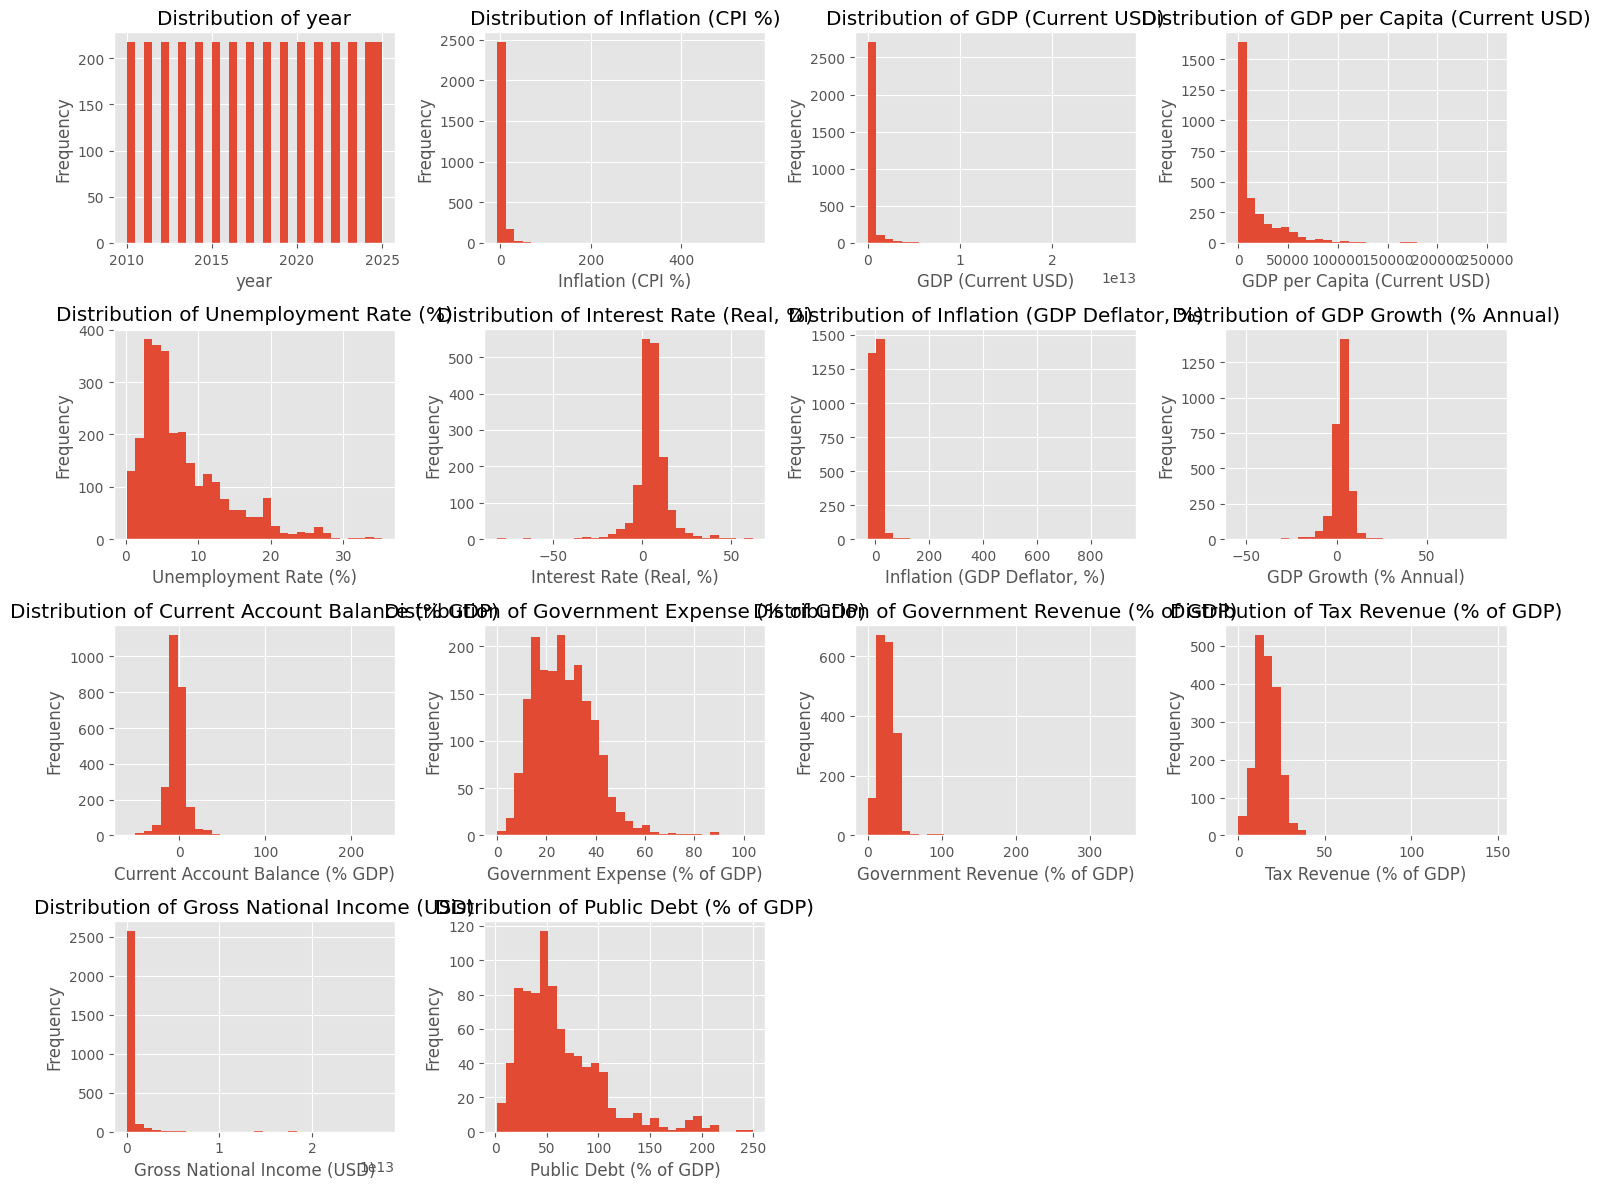

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plotting style
plt.style.use('ggplot')

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Number of rows and columns for the grid
n_cols = 4  # Adjust this number based on how many columns you want per row
n_rows = int(np.ceil(len(numerical_columns) / n_cols))  # Calculate rows based on number of columns

# Plot histograms in a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

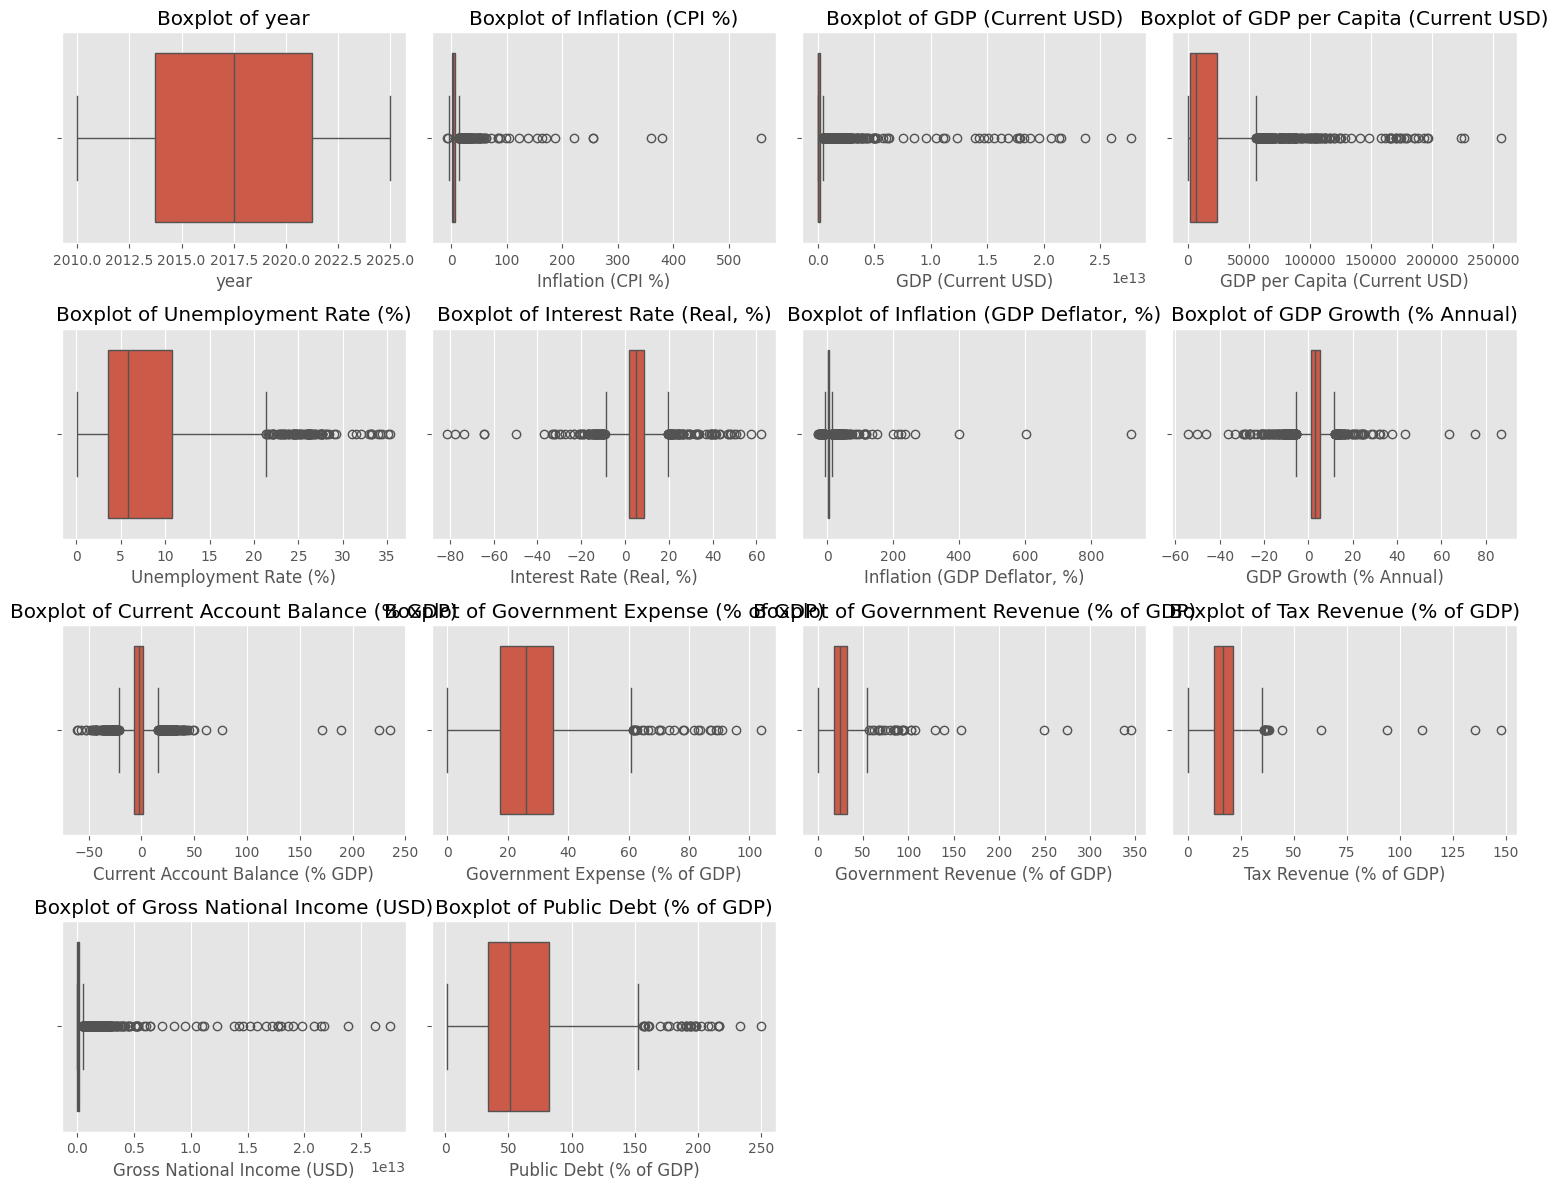

In [ ]:
# Plot boxplots in a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

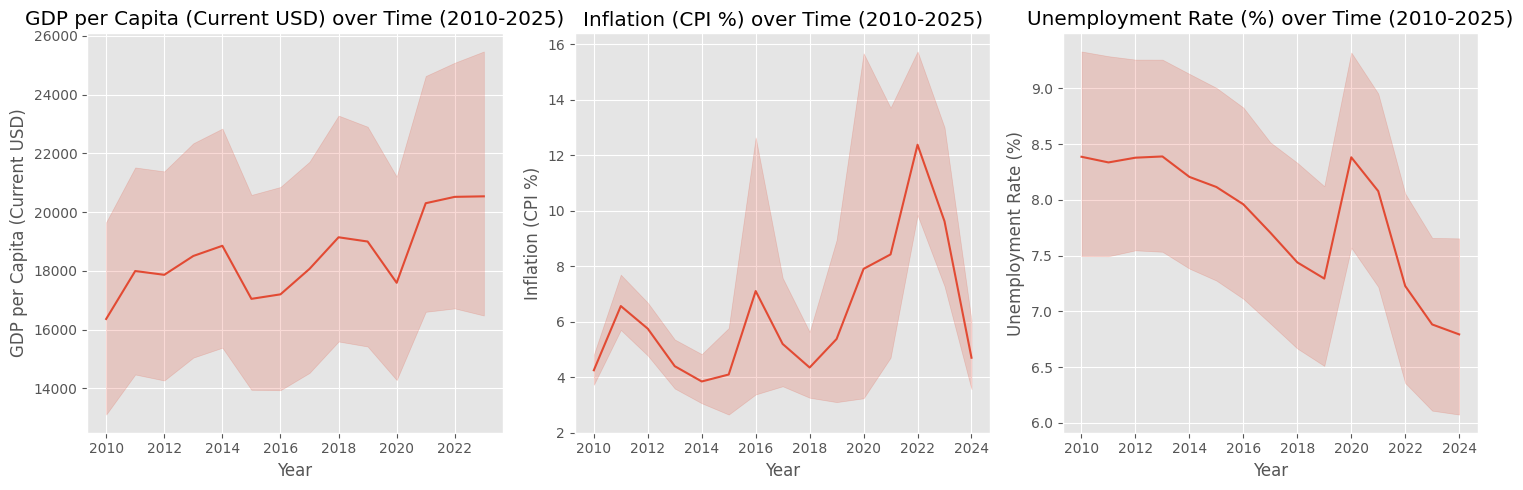

In [ ]:
# Time-series trends for key indicators over time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Key indicators to visualize over time
# key_indicators = ['gdp_usd_cap', 'inflation_cpi_cap', 'unemployment_rate_cap']
key_indicators = ['GDP per Capita (Current USD)', 'Inflation (CPI %)', 'Unemployment Rate (%)']

# Number of rows and columns for the grid
n_cols = 3  # Adjust this number based on how many columns you want per row
n_rows = int(np.ceil(len(key_indicators) / n_cols))  # Calculate rows based on number of indicators

# Plot time-series trends in a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, indicator in enumerate(key_indicators):
    sns.lineplot(x='year', y=indicator, data=df, ax=axes[i])
    axes[i].set_title(f'{indicator} over Time (2010-2025)')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(indicator)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

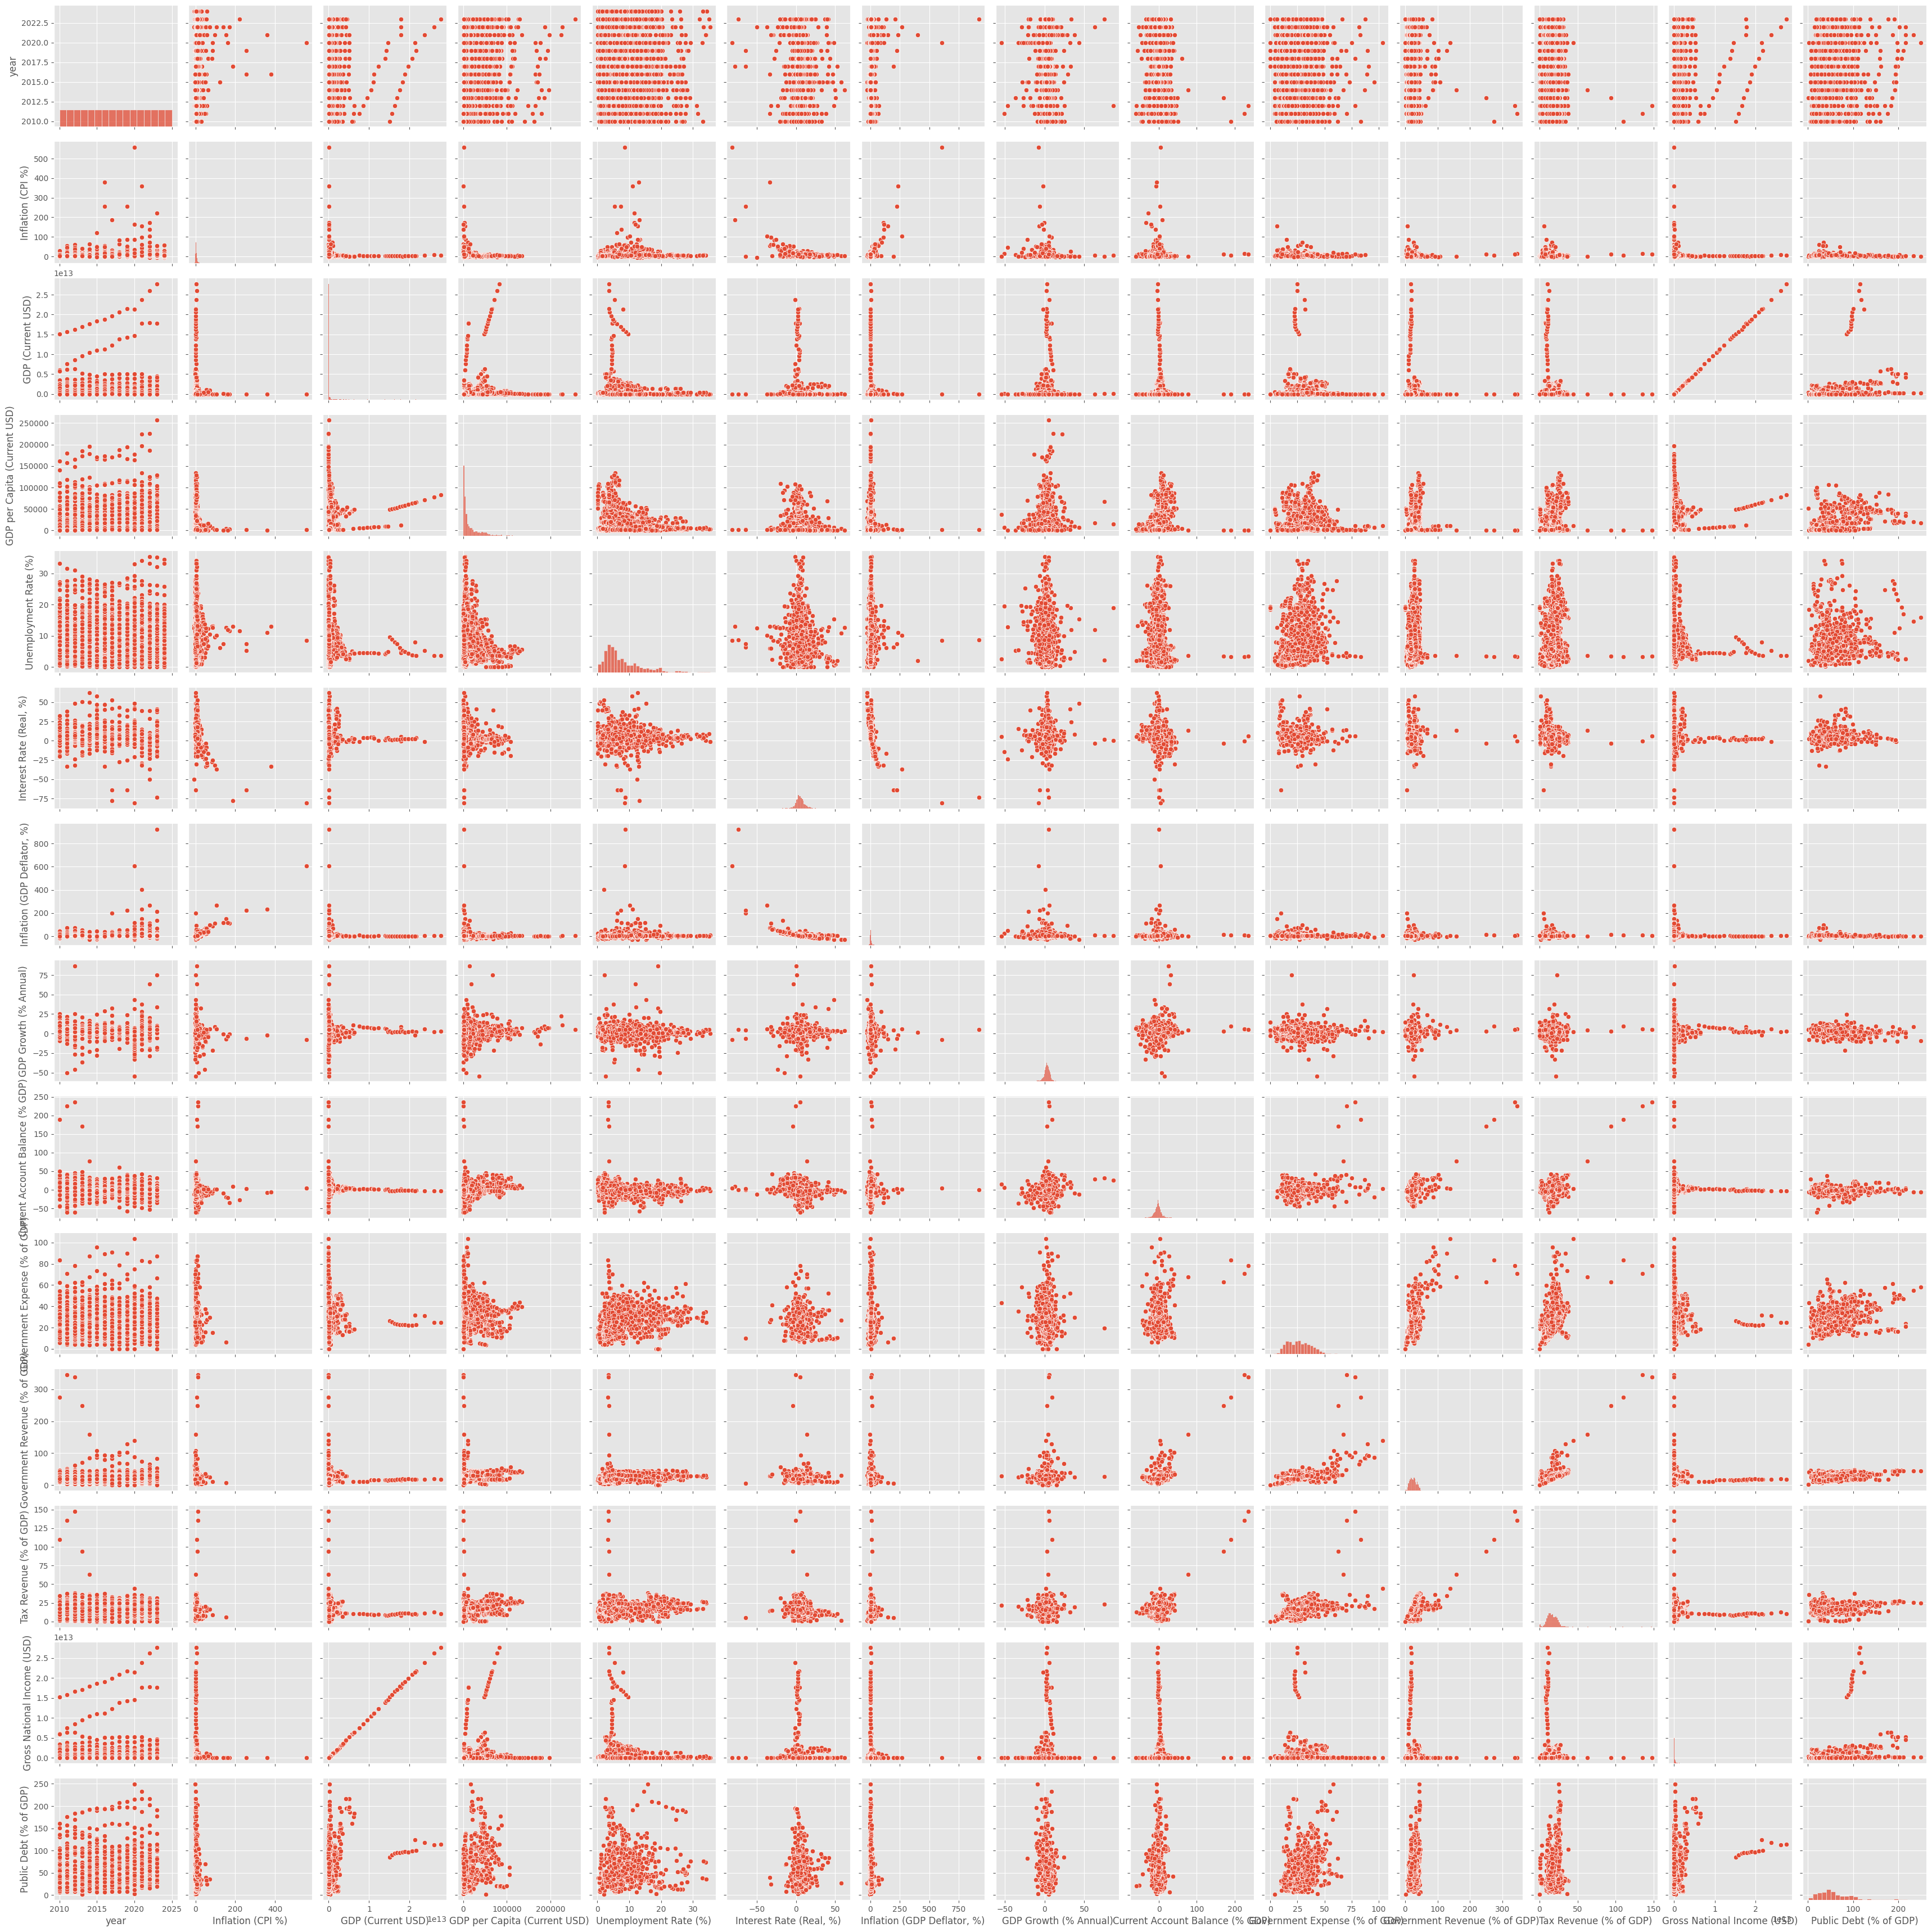

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create pairwise plot (scatter matrix) to check correlations
sns.pairplot(df[numerical_columns])
plt.show()

# **Visualizations**

1. Line Chart (Multi-Series Time Series)

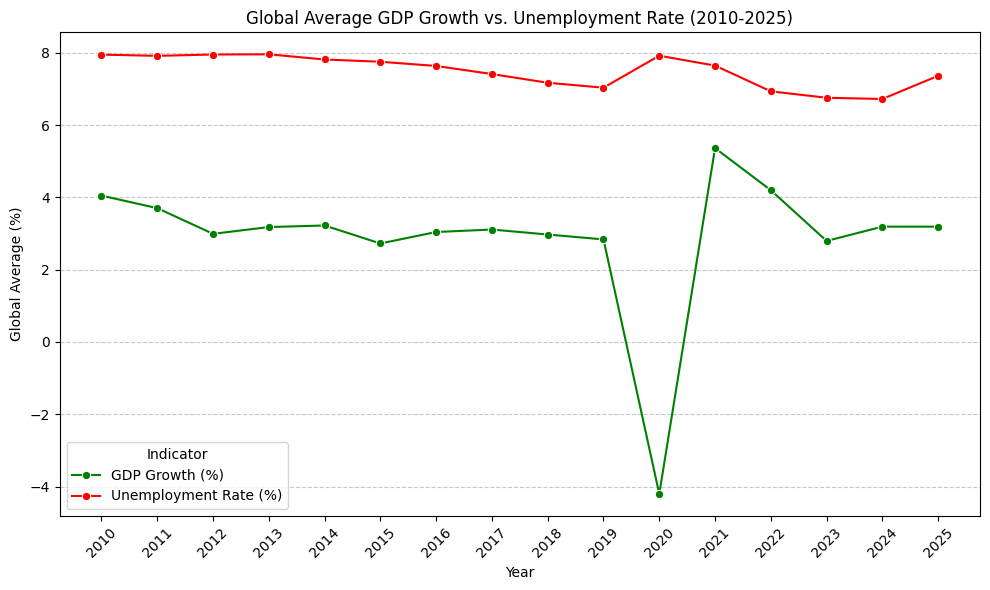

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame (added this line)
df = pd.read_csv('/content/cleaned_world_bank_data_2025.csv')

# Columns to analyze
indicators = ['gdp_growth_cap', 'unemployment_rate_cap']

# 1. Calculate the global average for each indicator per year
global_avg_trends = df.groupby('year')[indicators].mean().reset_index()

# 2. Melt the DataFrame for plotting multiple lines
plot_data = global_avg_trends.melt(
    id_vars='year',
    value_vars=indicators,
    var_name='Indicator',
    value_name='Global Average (%)'
)

# 3. Rename indicators for better plot labels
plot_data['Indicator'] = plot_data['Indicator'].replace({
    'gdp_growth_cap': 'GDP Growth (%)',
    'unemployment_rate_cap': 'Unemployment Rate (%)'
})

# 4. Plot the multi-series line chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=plot_data,
    x='year',
    y='Global Average (%)',
    hue='Indicator',
    palette={'GDP Growth (%)': 'green', 'Unemployment Rate (%)': 'red'},
    marker='o',
    dashes=False
)

plt.title('Global Average GDP Growth vs. Unemployment Rate (2010-2025)')
plt.xlabel('Year')
plt.ylabel('Global Average (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Indicator')
plt.xticks(plot_data['year'].unique(), rotation=45)
plt.tight_layout()
# plt.savefig('global_avg_gdp_unemployment_trend.png')

2. Stacked Bar Chart (Fiscal Indicators by Income Group)

/tmp/ipython-input-224909429.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('income_group')[fiscal_vars].mean().reset_index()


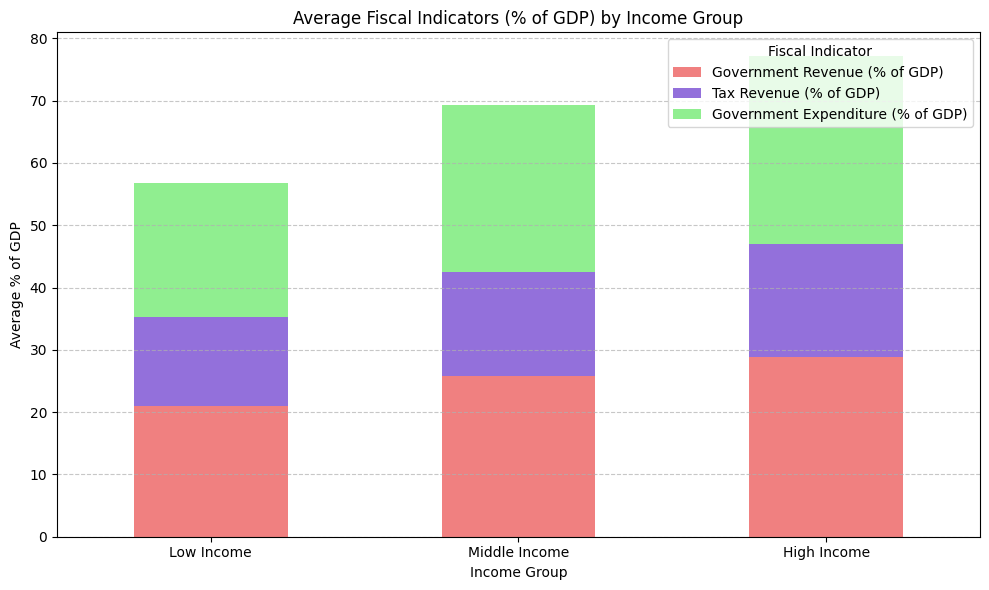

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame (added for robustness)
df = pd.read_csv('/content/cleaned_world_bank_data_2025.csv')

# --- PRE-PROCESSING TO ADD 'income_group' (REQUIRED FOR V2 & V3) ---
# Create a temporary dataframe grouped by country to calculate mean GDP per capita
df_grouped = df.groupby('country_id').mean(numeric_only=True).reset_index()
# Use quantiles of mean GDP per capita to assign a synthetic income group (Low, Middle, High)
df_grouped['income_group'] = pd.qcut(
    df_grouped['gdp_pc_usd_cap'],
    q=3,
    labels=['Low Income', 'Middle Income', 'High Income']
)
# Merge the new grouping back into the main DataFrame
df = pd.merge(df, df_grouped[['country_id', 'income_group']], on='country_id', how='left')
# ------------------------------------------------------------------------

# 1. Define fiscal variables
fiscal_vars = ['gov_exp_pct_gdp_cap', 'gov_rev_pct_gdp_cap', 'tax_rev_pct_gdp_cap']

# 2. Calculate the average of the fiscal indicators per income group
grouped_data = df.groupby('income_group')[fiscal_vars].mean().reset_index()

# 3. Rename columns for clean plotting labels
grouped_data.columns = ['Income Group', 'Government Expenditure (% of GDP)', 'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)']

# 4. Prepare data for stacking
plot_df = grouped_data.set_index('Income Group')
plot_df = plot_df[['Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)', 'Government Expenditure (% of GDP)']]


# 5. Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
plot_df.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['lightcoral', 'mediumpurple', 'lightgreen'] # Lighter custom colors
)

plt.title('Average Fiscal Indicators (% of GDP) by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average % of GDP')
plt.xticks(rotation=0)
plt.legend(title='Fiscal Indicator', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('stacked_bar_fiscal_indicators.png')

3. Scatterplots (Fiscal Indicators vs. GDP Growth)

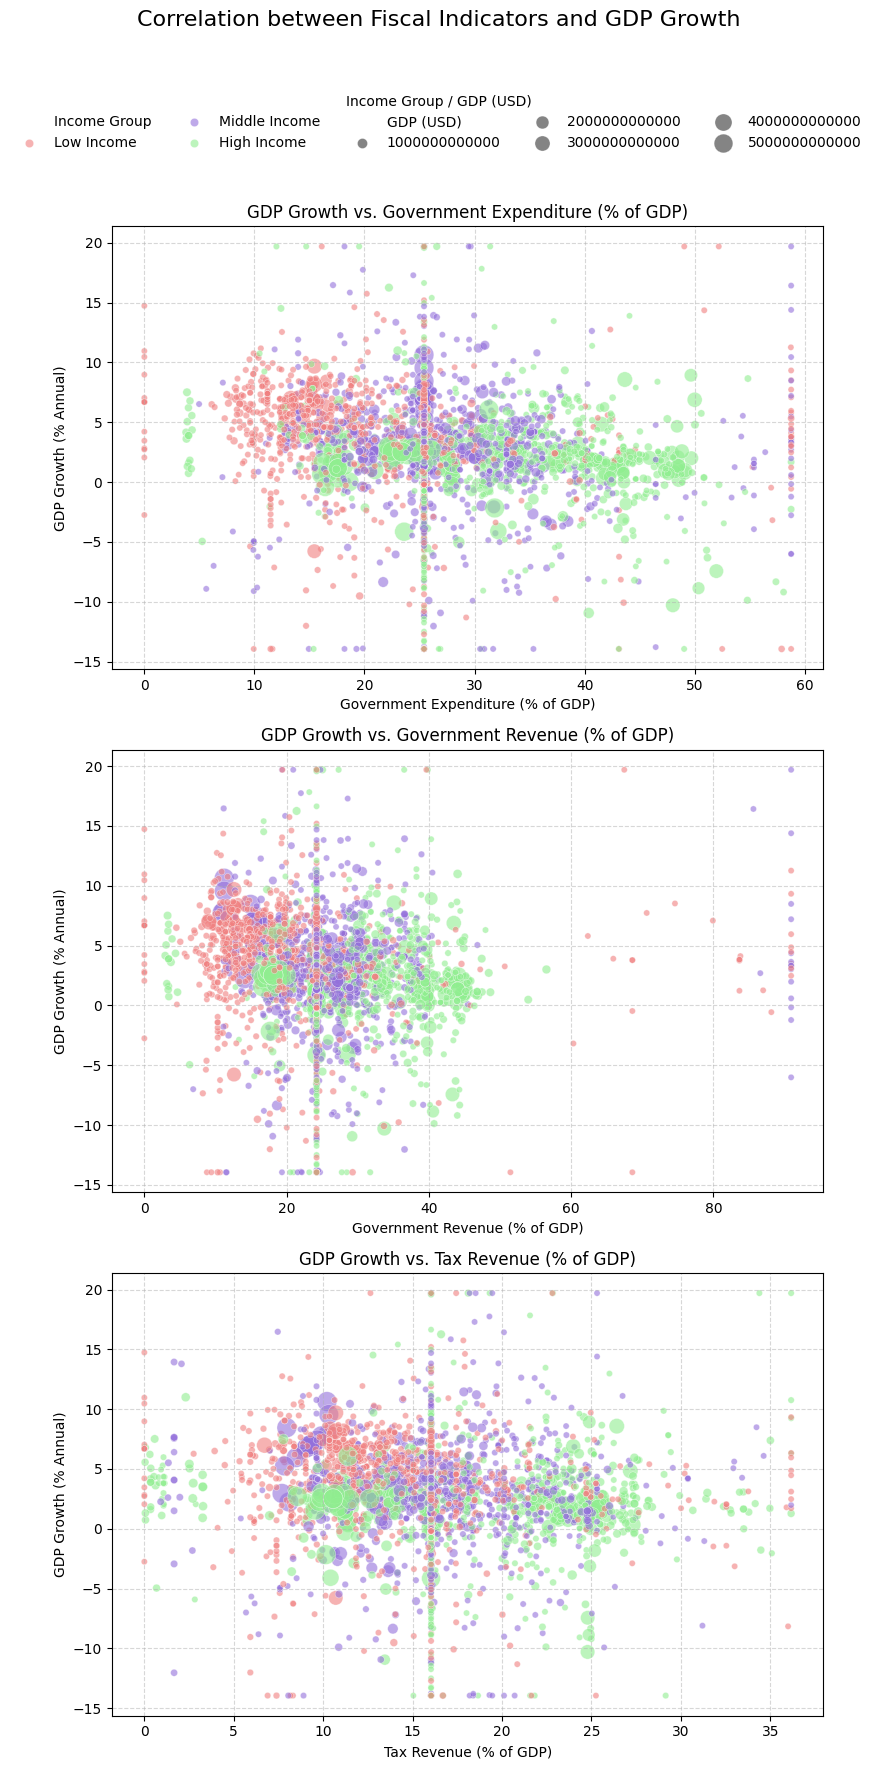

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame (ensures a fresh start for df in this cell)
df = pd.read_csv('/content/cleaned_world_bank_data_2025.csv')

# --- PRE-PROCESSING TO ADD 'income_group' (REQUIRED) ---
# Create a temporary dataframe grouped by country to calculate mean GDP per capita
df_grouped_temp = df.groupby('country_id').mean(numeric_only=True).reset_index()
# Use quantiles of mean GDP per capita to assign a synthetic income group (Low, Middle, High)
df_grouped_temp['income_group'] = pd.qcut(
    df_grouped_temp['gdp_pc_usd_cap'],
    q=3,
    labels=['Low Income', 'Middle Income', 'High Income']
)
# Merge the new grouping back into the main DataFrame
df_plot = pd.merge(df, df_grouped_temp[['country_id', 'income_group']], on='country_id', how='left')

# Rename columns in df_plot directly for clearer plot and legend titles
df_plot = df_plot.rename(columns={'income_group': 'Income Group', 'gdp_usd_cap': 'GDP (USD)'})
# --------------------------------------------------------

# Define the fiscal variables and their titles
fiscal_vars = {
    'gov_exp_pct_gdp_cap': 'Government Expenditure (% of GDP)',
    'gov_rev_pct_gdp_cap': 'Government Revenue (% of GDP)',
    'tax_rev_pct_gdp_cap': 'Tax Revenue (% of GDP)'
}

# Create a figure to hold all three plots in a column (vertical layout)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18), sharex=False) # Adjusted figsize for vertical
fig.suptitle('Correlation between Fiscal Indicators and GDP Growth', fontsize=16, y=0.98) # Adjusted y for title

# Define the custom color palette for income groups
custom_palette = {'Low Income': 'lightcoral', 'Middle Income': 'mediumpurple', 'High Income': 'lightgreen'}

# Initialize lists to store legend handles and labels
all_handles = []
all_labels = []

# Iterate through each fiscal variable to create a subplot
for i, (col, label) in enumerate(fiscal_vars.items()):
    ax = axes[i]

    # Use seaborn scatterplot to easily encode size and color
    scatter = sns.scatterplot(
        data=df_plot, # Now df_plot *itself* has the renamed columns
        x=col,
        y='gdp_growth_cap',
        size='GDP (USD)', # This column now exists in df_plot
        hue='Income Group', # This column now exists in df_plot
        palette=custom_palette, # Apply the custom palette
        sizes=(20, 200),
        alpha=0.6,
        ax=ax,
        legend='brief' # Use 'brief' to get handles but suppress full legend per plot
    )

    ax.set_title(f'GDP Growth vs. {label}', fontsize=12)
    ax.set_xlabel(label)
    ax.set_ylabel('GDP Growth (% Annual)')
    ax.grid(True, linestyle='--', alpha=0.5)

    # Collect legend handles and labels from the first plot (they are identical across subplots)
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
        all_handles.extend(handles)
        all_labels.extend(labels)

    # Remove individual subplot legends
    ax.legend_.remove()

# Create a single, combined legend for the entire figure
# Adjust bbox_to_anchor for positioning above the plots and rect for tight_layout
fig.legend(all_handles, all_labels,
           title='Income Group / GDP (USD)', # Combined title for clarity
           loc='upper center',
           bbox_to_anchor=(0.5, 0.94), # Position the legend after the main title
           ncol=5, # Arrange items horizontally
           frameon=False,
           fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.90]) # Adjusted rect to make space for the legend above
# plt.savefig('scatterplots_fiscal_vs_growth_vertical.png')

4. Choropleth Map (GDP per Capita Growth by Country)

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset into a DataFrame (added for robustness)
df = pd.read_csv('/content/cleaned_world_bank_data_2025.csv')

# 1. Calculate the GDP per Capita Growth (2010-2025)
# Pivot the table to get 2010 and 2025 values side-by-side
df_pivot = df.pivot_table(
    index='country_id',
    columns='year',
    values='gdp_pc_usd_cap'
).reset_index()

# Ensure 2010 and 2025 columns exist
if 2010 in df_pivot.columns and 2025 in df_pivot.columns:
    # Calculate the overall growth rate: (End / Start - 1) * 100
    df_pivot['GDP_PC_Growth_Rate'] = ((df_pivot[2025] / df_pivot[2010]) - 1) * 100

    growth_data = df_pivot.dropna(subset=['GDP_PC_Growth_Rate'])

    # Merge country names into growth_data for better mapping and hover info
    country_names_map = df[['country_id', 'country_name']].drop_duplicates()
    growth_data = pd.merge(growth_data, country_names_map, on='country_id', how='left')

    # 2. Generate the Choropleth Map
    fig = px.choropleth(
        growth_data,
        locations='country_name',  # Reverted to country_name for geometry mapping
        locationmode='country names', # Reverted to 'country names'
        color='GDP_PC_Growth_Rate',
        hover_name='country_name', # Use country_name for hover info
        color_continuous_scale=px.colors.sequential.Plasma,
        title='GDP per Capita Growth Rate (2010-2025)'
    )

    fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
    fig.show()
else:
    print("Error: Could not find GDP per Capita data for both 2010 and 2025 to calculate growth.")

5. Small Multiples Line Charts (Regional GDP Trends)

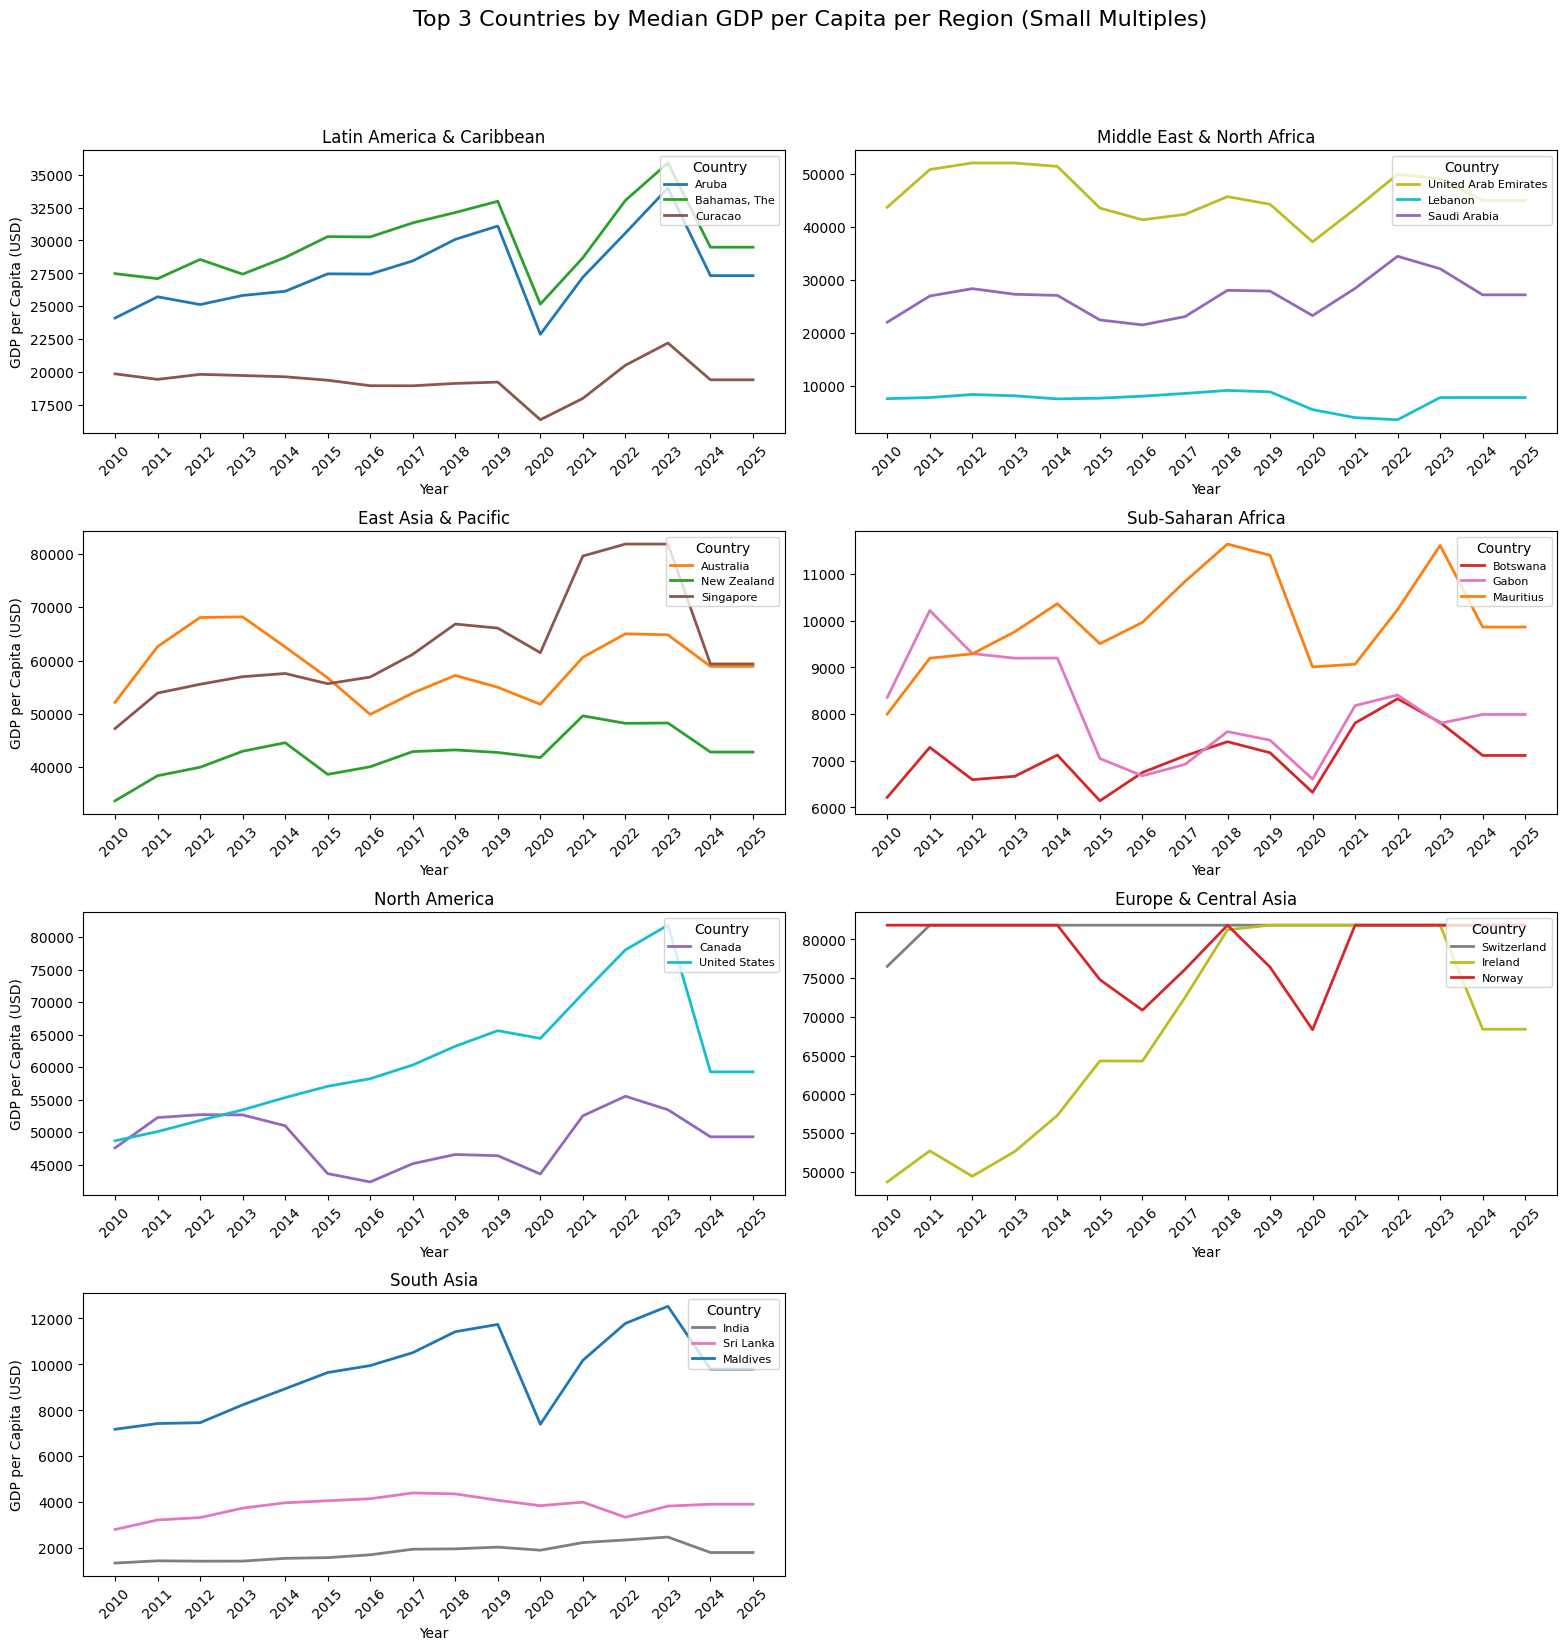

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("cleaned_world_bank_data_2025.csv")

# --- 1. Data Preparation and Filtering (Top 3 Countries) ---

# Region Mapping Dictionary
region_map = {
    # Latin America and the Caribbean
    "Antigua and Barbuda": "Latin America & Caribbean", "Argentina": "Latin America & Caribbean", "Aruba": "Latin America & Caribbean",
    "Bahamas, The": "Latin America & Caribbean", "Barbados": "Latin America & Caribbean", "Belize": "Latin America & Caribbean",
    "Bolivia": "Latin America & Caribbean", "Brazil": "Latin America & Caribbean", "Chile": "Latin America & Caribbean", "Colombia": "Latin America & Caribbean",
    "Costa Rica": "Latin America & Caribbean", "Cuba": "Latin America & Caribbean", "Curacao": "Latin America & Caribbean",
    "Dominica": "Latin America & Caribbean", "Dominican Republic": "Latin America & Caribbean", "Ecuador": "Latin America & Caribbean",
    "El Salvador": "Latin America & Caribbean", "Grenada": "Latin America & Caribbean", "Guatemala": "Latin America & Caribbean",
    "Honduras": "Latin America & Caribbean", "Jamaica": "Latin America & Caribbean", "Mexico": "Latin America & Caribbean", "Nicaragua": "Latin America & Caribbean",
    "Panama": "Latin America & Caribbean", "Paraguay": "Latin America & Caribbean", "Peru": "Latin America & Caribbean", "Uruguay": "Latin America & Caribbean",
    "Venezuela, RB": "Latin America & Caribbean", "Guyana": "Latin America & Caribbean", "Suriname": "Latin America & Caribbean", "Trinidad and Tobago": "Latin America & Caribbean",

    # Sub-Saharan Africa
    "Angola": "Sub-Saharan Africa", "Benin": "Sub-Saharan Africa", "Botswana": "Sub-Saharan Africa", "Burkina Faso": "Sub-Saharan Africa",
    "Burundi": "Sub-Saharan Africa", "Cameroon": "Sub-Saharan Africa", "Chad": "Sub-Saharan Africa", "Comoros": "Sub-Saharan Africa",
    "Congo, Dem. Rep.": "Sub-Saharan Africa", "Congo, Rep": "Sub-Saharan Africa", "Eritrea": "Sub-Saharan Africa", "Ethiopia": "Sub-Saharan Africa",
    "Gabon": "Sub-Saharan Africa", "Gambia, The": "Sub-Saharan Africa", "Ghana": "Sub-Saharan Africa", "Guinea": "Sub-Saharan Africa",
    "Kenya": "Sub-Saharan Africa", "Madagascar": "Sub-Saharan Africa", "Malawi": "Sub-Saharan Africa", "Mali": "Sub-Saharan Africa",
    "Mauritius": "Sub-Saharan Africa", "Mozambique": "Sub-Saharan Africa", "Namibia": "Sub-Saharan Africa", "Niger": "Sub-Saharan Africa",
    "Nigeria": "Sub-Saharan Africa", "Rwanda": "Sub-Saharan Africa", "Senegal": "Sub-Saharan Africa", "Sierra Leone": "Sub-Saharan Africa",
    "South Africa": "Sub-Saharan Africa", "Sudan": "Sub-Saharan Africa", "Tanzania": "Sub-Saharan Africa", "Togo": "Sub-Saharan Africa",
    "Uganda": "Sub-Saharan Africa", "Zambia": "Sub-Saharan Africa", "Zimbabwe": "Sub-Saharan Africa",

    # East Asia & Pacific
    "Australia": "East Asia & Pacific", "China": "East Asia & Pacific", "Fiji": "East Asia & Pacific", "Indonesia": "East Asia & Pacific",
    "Japan": "East Asia & Pacific", "Korea, Rep.": "East Asia & Pacific", "Malaysia": "East Asia & Pacific", "New Zealand": "East Asia & Pacific",
    "Philippines": "East Asia & Pacific", "Singapore": "East Asia & Pacific", "Thailand": "East Asia & Pacific", "Viet Nam": "East Asia & Pacific",

    # Europe & Central Asia
    "Albania": "Europe & Central Asia", "Austria": "Europe & Central Asia", "Belarus": "Europe & Central Asia", "Belgium": "Europe & Central Asia",
    "Bulgaria": "Europe & Central Asia", "Croatia": "Europe & Central Asia", "Czechia": "Europe & Central Asia", "Denmark": "Europe & Central Asia",
    "Finland": "Europe & Central Asia", "France": "Europe & Central Asia", "Germany": "Europe & Central Asia", "Greece": "Europe & Central Asia",
    "Hungary": "Europe & Central Asia", "Iceland": "Europe & Central Asia", "Ireland": "Europe & Central Asia", "Italy": "Europe & Central Asia",
    "Kazakhstan": "Europe & Central Asia", "Netherlands": "Europe & Central Asia", "Norway": "Europe & Central Asia", "Poland": "Europe & Central Asia",
    "Portugal": "Europe & Central Asia", "Romania": "Europe & Central Asia", "Russian Federation": "Europe & Central Asia", "Serbia": "Europe & Central Asia",
    "Slovak Republic": "Europe & Central Asia", "Spain": "Europe & Central Asia", "Sweden": "Europe & Central Asia", "Switzerland": "Europe & Central Asia",
    "Turkiye": "Europe & Central Asia", "Ukraine": "Europe & Central Asia", "United Kingdom": "Europe & Central Asia",

    # Middle East & North Africa (MENA)
    "Egypt, Arab Rep.": "Middle East & North Africa", "Iran, Islamic Rep.": "Middle East & North Africa", "Iraq": "Middle East & North Africa",
    "Jordan": "Middle East & North Africa", "Lebanon": "Middle East & North Africa", "Morocco": "Middle East & North Africa",
    "Saudi Arabia": "Middle East & North Africa", "Tunisia": "Middle East & North Africa", "United Arab Emirates": "Middle East & North Africa",

    # South Asia
    "Bangladesh": "South Asia", "India": "South Asia", "Maldives": "South Asia", "Nepal": "South Asia", "Pakistan": "South Asia", "Sri Lanka": "South Asia",

    # North America
    "Canada": "North America", "United States": "North America",
}

# Apply the map and filter out 'Other/Unclassified'
df["region"] = df["country_name"].map(region_map).fillna("Other/Unclassified")
df_filtered = df[df["region"] != "Other/Unclassified"].copy()
df_filtered['year'] = df_filtered['year'].astype(int)

# 1. Calculate the median GDP per capita for each country
median_gdp = df_filtered.groupby('country_name')['gdp_pc_usd_cap'].median().reset_index(name='median_gdp_pc')

# Merge this median GDP back into df_filtered so we can use it for sorting within regions
df_filtered_with_median_gdp = pd.merge(df_filtered, median_gdp, on='country_name', how='left')

# 2. Get a list of the top 3 countries for each region based on their median GDP per capita
top_countries_list = []
for region_name, group_df in df_filtered_with_median_gdp.groupby('region'):
    # For each region, find the top 3 *unique* countries based on their median_gdp_pc
    # First, get unique countries and their median_gdp_pc within this regional group
    unique_countries_in_region = group_df.drop_duplicates(subset=['country_name'])
    # Then, identify the top 3 countries by median_gdp_pc
    top_3_country_names = unique_countries_in_region.nlargest(3, 'median_gdp_pc')['country_name'].tolist()
    top_countries_list.extend(top_3_country_names)

# Ensure the list of top countries for filtering contains only unique names
top_countries_list = list(set(top_countries_list))

# 3. Filter the main DataFrame to only include these top countries
df_final = df_filtered_with_median_gdp[df_filtered_with_median_gdp['country_name'].isin(top_countries_list)].copy()

# --- 2. Matplotlib Plotting Setup (2 Graphs Per Row) ---

# Get unique regions and order them
region_order = df_final['region'].unique().tolist()
n_regions = len(region_order)

# Set grid dimensions: 2 columns is required
cols = 2
rows = int(np.ceil(n_regions / ncols))

# Create the figure and subplots. sharey=False is critical for independent y-axes.
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 4 * nrows), sharex=False, sharey=False)
axes = axes.flatten()

# Title and layout adjustment
fig.suptitle('Top 3 Countries by Median GDP per Capita per Region (Small Multiples)', fontsize=16, y=1.02)
fig.tight_layout(pad=3.0, h_pad=5.0, w_pad=2.0) # Increased h_pad for more vertical spacing

# Create a deterministic color map for the countries for consistency
# Using plt.colormaps.get_cmap for newer Matplotlib versions
colors = plt.colormaps['tab10']

# Create country_to_color mapping based on unique top countries for consistent coloring
unique_top_countries = sorted(list(set(top_countries_list))) # Ensure deterministic order
country_to_color = {country: colors(i % 10) for i, country in enumerate(unique_top_countries)}

# --- 3. Plotting Loop ---
# Removed global legend collection variables

for i, region in enumerate(region_order):
    ax = axes[i]
    region_df = df_final[df_final['region'] == region]

    # Plot line for each of the Top 3 countries in the region
    for country in region_df['country_name'].unique():
        country_df = region_df[region_df['country_name'] == country]
        ax.plot(country_df['year'], country_df['gdp_pc_usd_cap'],
                        label=country,
                        color=country_to_color.get(country, 'gray'), # Use deterministic color
                        linewidth=2.0)

    # Subplot details
    ax.set_title(region, fontsize=12)
    # Set explicit x-ticks to display all years present in the region's data
    ax.set_xticks(region_df['year'].unique())
    ax.tick_params(axis='x', rotation=45)

    # Only label the y-axis on the first subplot of each row (left column)
    if i % ncols == 0:
        ax.set_ylabel('GDP per Capita (USD)', fontsize=10)

    # Add x-axis label to all subplots
    ax.set_xlabel('Year', fontsize=10)

    # Remove the MaxNLocator as we are setting explicit ticks
    # ax.get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))

    # Add individual legend for each subplot
    ax.legend(title='Country', loc='upper right', fontsize=8)

# Hide any unused subplots
for j in range(n_regions, nrows * ncols):
    fig.delaxes(axes[j])

# Removed global legend creation

# Render the chart in Colab
# No plt.show() or plt.savefig() needed in Colab for standard display